### Importando librerias

In [78]:
import missingno as msno
import pandas as pd
import pandas_profiling as pf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = [15, 10]

In [33]:
data = pd.read_csv('bones.csv')

In [34]:
data.head()

,ID,Location,Site_Number,Age_Minumum,Age_Maximum,Sex,Grave Number,Canine number,Canine largest age,Canine 2nd largest age,...,Height in grave,Abnormalities Vertebras,Femur left,Femur right,Abnormalities Femur,Notes,Date,Signature,Hyperplasia,Teeth Scorable
0,1,Ribe,ASR1015,20,24.0,Male,G40,2.0,3.0,5.0,...,173.5,NaN,49.6,50.0,Br?kket Postmortalt,NaN,5/5/2008,Mwod,True,True
1,4,Ribe,ASR1015,35,45.0,Male,G312,3.0,4.0,4.5,...,170.0,NaN,48.4,48.5,NaN,l?bedannelser,5/8/2008,MWOD,True,True
2,5,Ribe,ASR1015,50,60.0,Male,G229,0.0,0.0,0.0,...,171.5,To hvirvler fusioneret - har ingen betydning f...,50.8,51.3,NaN,NaN,5/8/2008,MWOD,False,True
3,6,Ribe,ASR1015,30,40.0,Male,G257,NaN,NaN,NaN,...,165.0,NaN,45.4,NaN,NaN,"Male?, h?jre femur kan ikke m?les da nedbrudt,...",5/8/2008,MWOD,False,False
4,7,Ribe,ASR1015,45,55.0,Male,G74,NaN,NaN,NaN,...,165.0,NaN,47.5,46.6,NaN,kraniet mangler - kig efter om det er p? udsti...,NaN,NaN,False,False


# Missing Values

Vamos a utilizar la libreria `missingno` para ver la estructura de los datos faltantes.

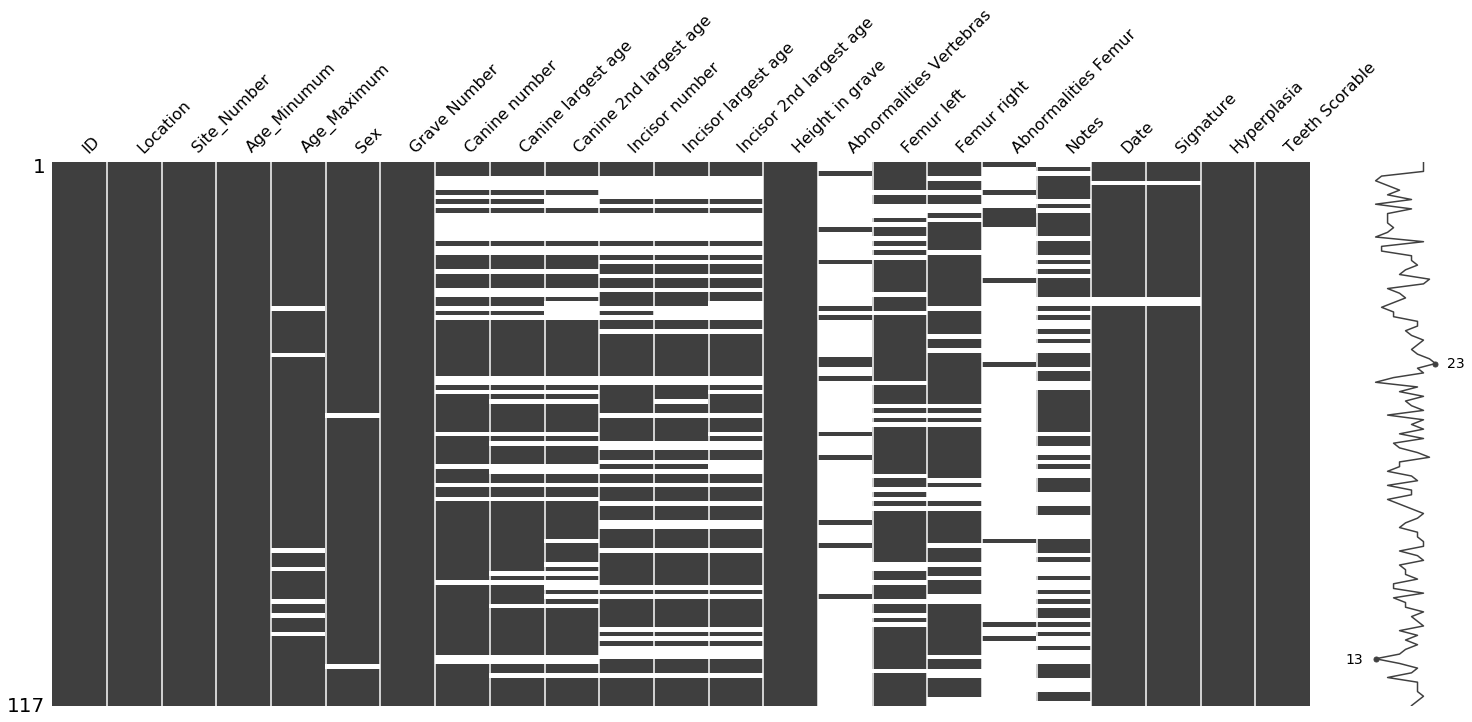

In [35]:
msno.matrix(data)

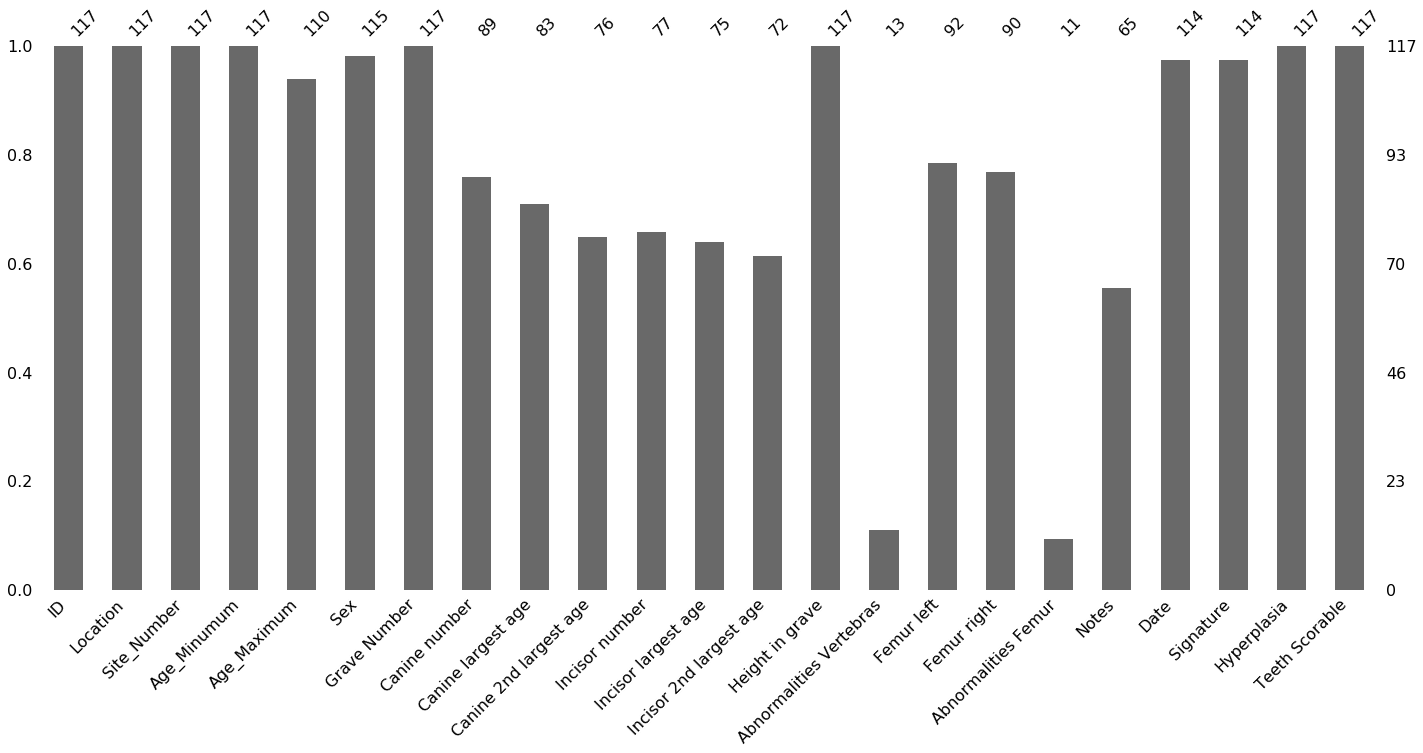

In [36]:
msno.bar(data)

Podemos ver que hay una gran cantidad de datos faltantes, sobretodo en `Abnormalities Vertebras` y `Abnormalities Femur`. Como el objetivo de este estudio es predecir la altura en base al tamaño del femur vamos a comenzar por solucionar el problema con los missng values de `Femur left` y `Femur right`.

Como vimos en el analisis de atributos existen valores iguales a 0, para nosotros esos valores son iguales a `NaN` ya que no aporntan a la solucion del problema.


In [37]:
data.loc[data['Femur left']      == 0.0] = np.nan
data.loc[data['Femur right']     == 0.0] = np.nan
data.loc[data['Height in grave'] == 0.0] = np.nan

Vamos a analizar los dataos faltantes para los valores que vamos a utilizar `Femur left` y `Femur right`

In [38]:
femur_size = data[['ID','Femur left','Femur right']]

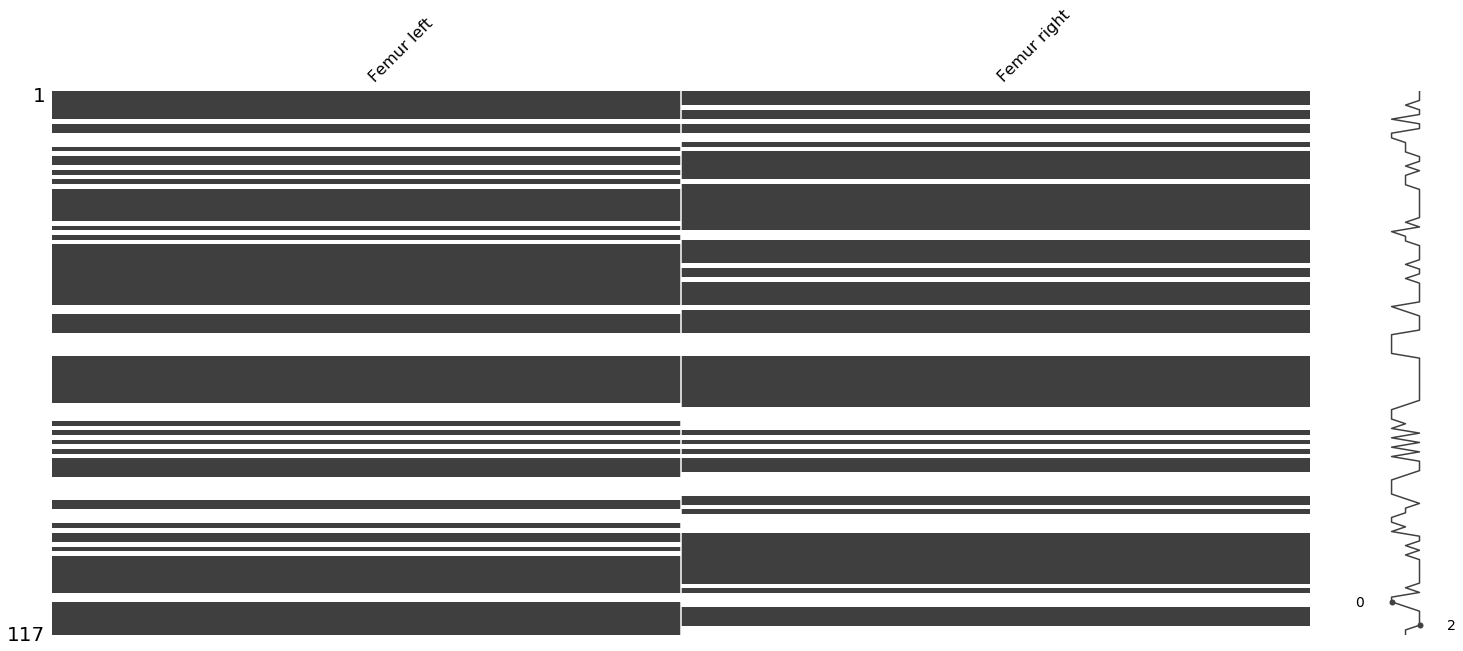

In [39]:
msno.matrix(femur_size[['Femur left','Femur right']])

In [40]:
full_values_femur = pd.DataFrame(data=femur_size)

In [41]:
full_values_femur = femur_size.dropna()

Una vez eliminados los valores `NaN` podemos ver de que restos tenemos el tamaño de ambos femur y ver si existe una gran diferencia de tamaño entre ellos para mas adelante sustituir los faltantes con su contraparte.

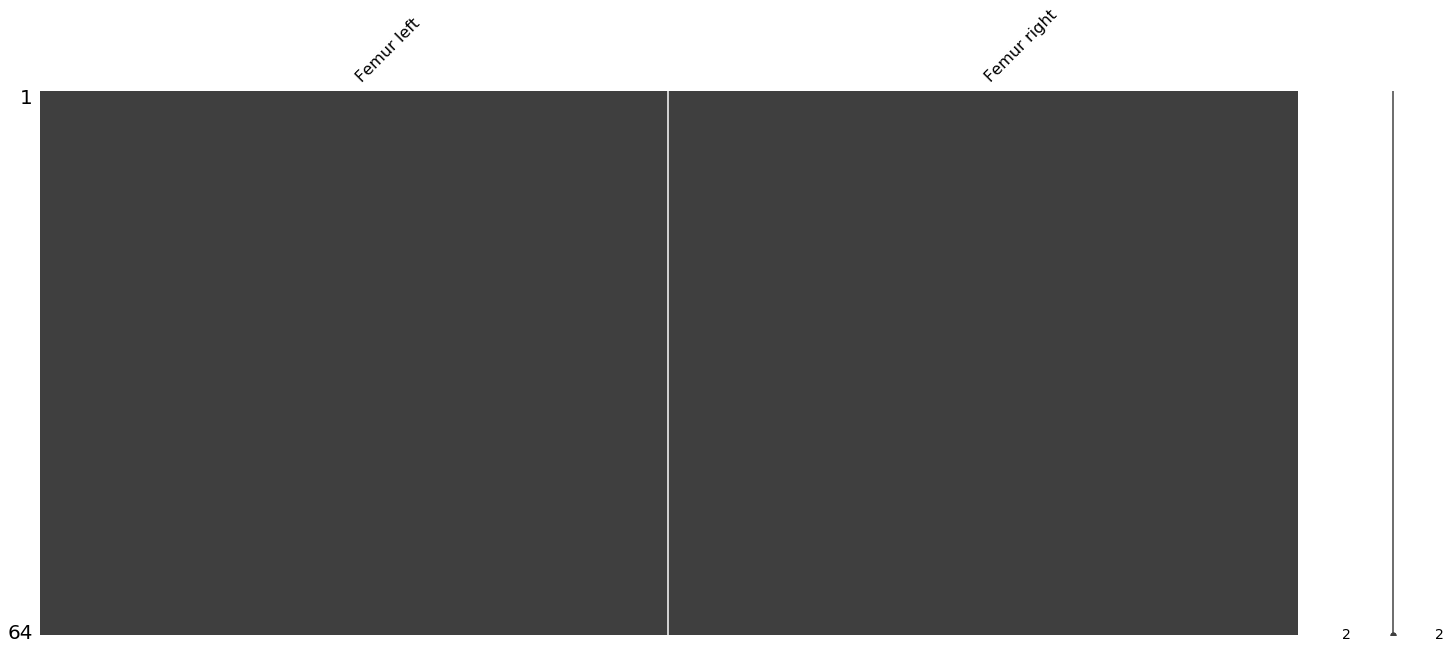

In [42]:
msno.matrix(full_values_femur[['Femur left','Femur right']])

In [43]:
r_femur__l_femur_difference = pd.DataFrame()
r_femur__l_femur_difference['Difference'] = abs(full_values_femur['Femur left'] - full_values_femur['Femur right'])

In [44]:
full_values_femur = r_femur__l_femur_difference.Difference.sort_values(ascending=False)

In [45]:
full_values_femur = pd.DataFrame(full_values_femur.head(5))

# Outlyers

Podemos ver que la diferencia de tamaño es muy poca entre los femurs

In [46]:
full_values_femur.describe()

,Difference
count,5.00000
mean,1.34000
std,0.74027
min,0.80000
25%,0.90000
50%,1.00000
75%,1.40000
max,2.60000


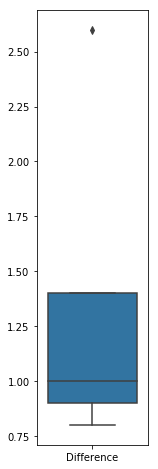

In [47]:
fig, ax = plt.subplots(figsize=(2,8))
sns.boxplot(ax=ax, data=full_values_femur)

Podemos ver que la diferencia entre el femur derecho e izquierdo  suele ser muy pequeña, asi que vamos a asignarle a los valores faltantes que tienen una contraparte su valor.

In [48]:
data.loc[data['Femur left'].isnull(),'Femur left']   = data['Femur right']
data.loc[data['Femur right'].isnull(),'Femur right'] = data['Femur left']

In [49]:
both_missing = data[data['Femur left'].isnull()==True]
len(both_missing)

26

Podemos ver que quedamos con 26 de 117 valores NaN para los cuales no sabemos las medidas de ningun femur.

In [52]:
both_missing

,ID,Location,Site_Number,Age_Minumum,Age_Maximum,Sex,Grave Number,Canine number,Canine largest age,Canine 2nd largest age,...,Height in grave,Abnormalities Vertebras,Femur left,Femur right,Abnormalities Femur,Notes,Date,Signature,Hyperplasia,Teeth Scorable
6,9.0,Ribe,ASR1015,50.0,60.0,Male,G377,3.0,3.5,5.0,...,166.0,NaN,NaN,NaN,Kn?kkede postmortalt s? kan ikke m?les,Incisor mere end 1/3 slidt ned,5/8/2008,MWOD,1.0,1.0
9,12.0,Ribe,ASR1015,50.0,60.0,Female,G104,NaN,NaN,NaN,...,150.0,NaN,NaN,NaN,NaN,"Kraniet mangler, kig om det er p? udstilling",5/8/2008,MWOD,0.0,0.0
10,13.0,Ribe,ASR1015,35.0,44.0,Female,G159,2.0,4.0,4.3,...,158.5,NaN,NaN,NaN,Begge l?rben for nedbrudte til at m?le,NaN,5/8/2008,MWOD,0.0,1.0
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,56.0,Ribe,ASR1015,35.0,40.0,Female,G808,0.0,0.0,0.0,...,153.0,NaN,NaN,NaN,NaN,Intet at kigge p?. Intet kranie. Female?,5/27/2008,MWOD,0.0,0.0
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,58.0,Ribe,ASR1015,50.0,60.0,NaN,G802,3.0,4.0,2.5,...,165.0,NaN,NaN,NaN,NaN,K?n ukendt. T?nder har ikke noget at sidde fas...,5/27/2008,MWOD,1.0,1.0
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tambien podemos ver que la mayoria de estos casos no esta bien documentado y tiene muchos valores `NaN`. Vamos a eliminar los que tienen valores `NaN` en la altura de la tumba ya que no tienen informacion relevante para el caso de estudio.

In [58]:
data = data[np.isfinite(data['Femur left'])]

# Linear Regression

Para hacer la regresion lineal vamos a utilizar solo los tamaños de femurs.

In [62]:
femur_height_data = data.drop(['ID', 'Location', 'Site_Number', 'Age_Minumum', 'Age_Maximum', 'Sex',
       'Grave Number', 'Canine number', 'Canine largest age',
       'Canine 2nd largest age', 'Incisor number', 'Incisor largest age',
       'Incisor 2nd largest age', 'Abnormalities Vertebras', 'Abnormalities Femur', 'Notes', 'Date',
       'Signature', 'Hyperplasia', 'Teeth Scorable'],1)

In [63]:
femur_height_data.head()

,Height in grave,Femur left,Femur right
0,173.5,49.6,50.0
1,170.0,48.4,48.5
2,171.5,50.8,51.3
3,165.0,45.4,45.4
4,165.0,47.5,46.6


Vamos a comenzar utilizando el femur derecho.

In [65]:
rf_data = pd.DataFrame()
rf_data['Femur right'] = femur_height_data['Femur right']
rf_data['Height in grave'] = femur_height_data['Height in grave']

In [67]:
rf_data.head()

,Femur right,Height in grave
0,50.0,173.5
1,48.5,170.0
2,51.3,171.5
3,45.4,165.0
4,46.6,165.0


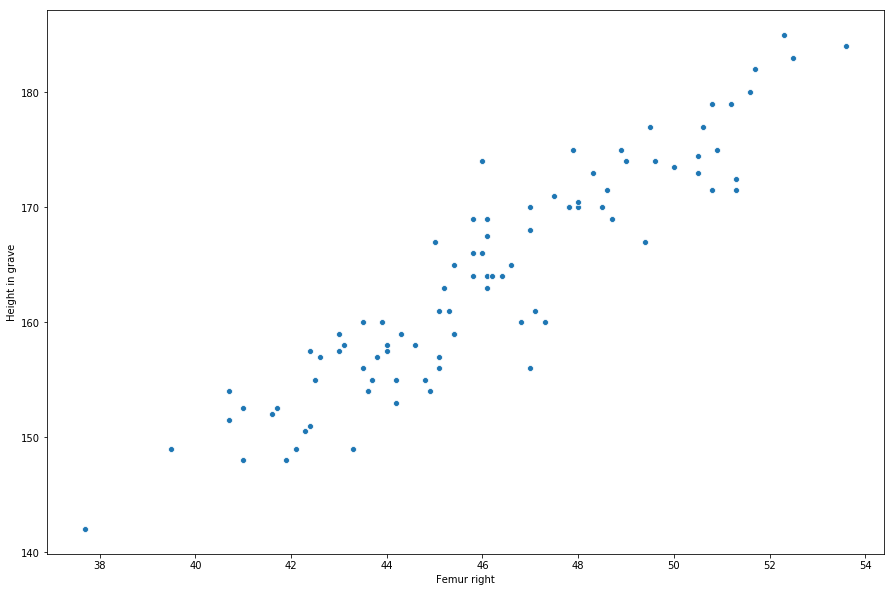

In [99]:
sns.scatterplot(x='Femur right', y='Height in grave', data=rf_data)
plt.show()

Podemos ver muy facilmente que esto es un problema adecuado para una regresion lineal.

Importamos las liberias para poder hacer la regresion lineal

In [80]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Separamos en `training` y `test` set.

In [82]:
len(rf_data)*0.3

27.3

In [83]:
X_train = rf_data['Femur right'][23:]
X_test  = rf_data['Femur right'][:23]
y_train = rf_data['Height in grave'][23:]
y_test  = rf_data['Height in grave'][:23]

In [84]:
regression = linear_model.LinearRegression()

In [85]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test  = X_test.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)

In [86]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
y_pred = regression.predict(X_test)

In [90]:
print('Coeficiente:', regression.coef_[0][0])
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coeficiente: 2.649907727761467
Mean squared error: 11.22
Variance score: 0.86


Ahora mostramos graficamente nuestros resultados

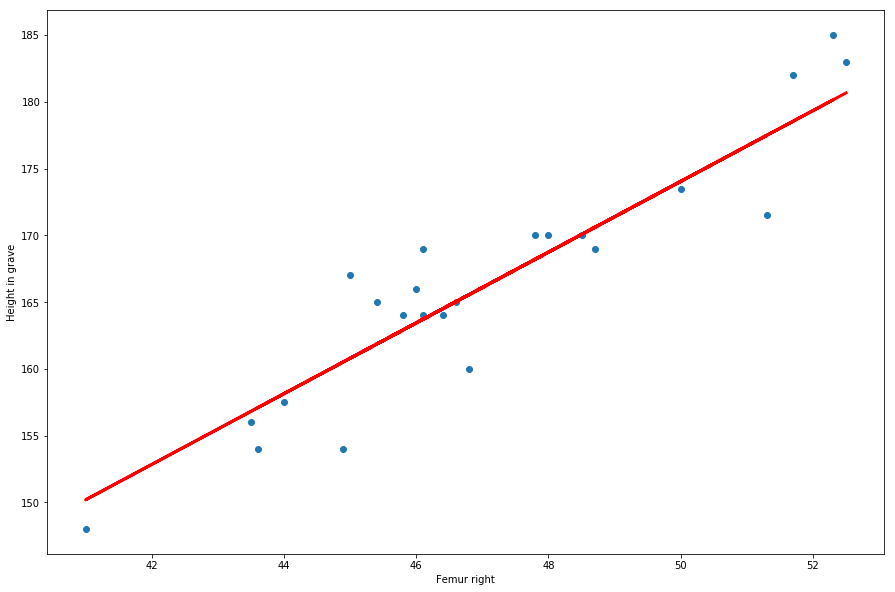

In [98]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel("Femur right")
plt.ylabel("Height in grave")
plt.show()